# Understat Series : xG Rolling averages


**By Jose Gonzalez**
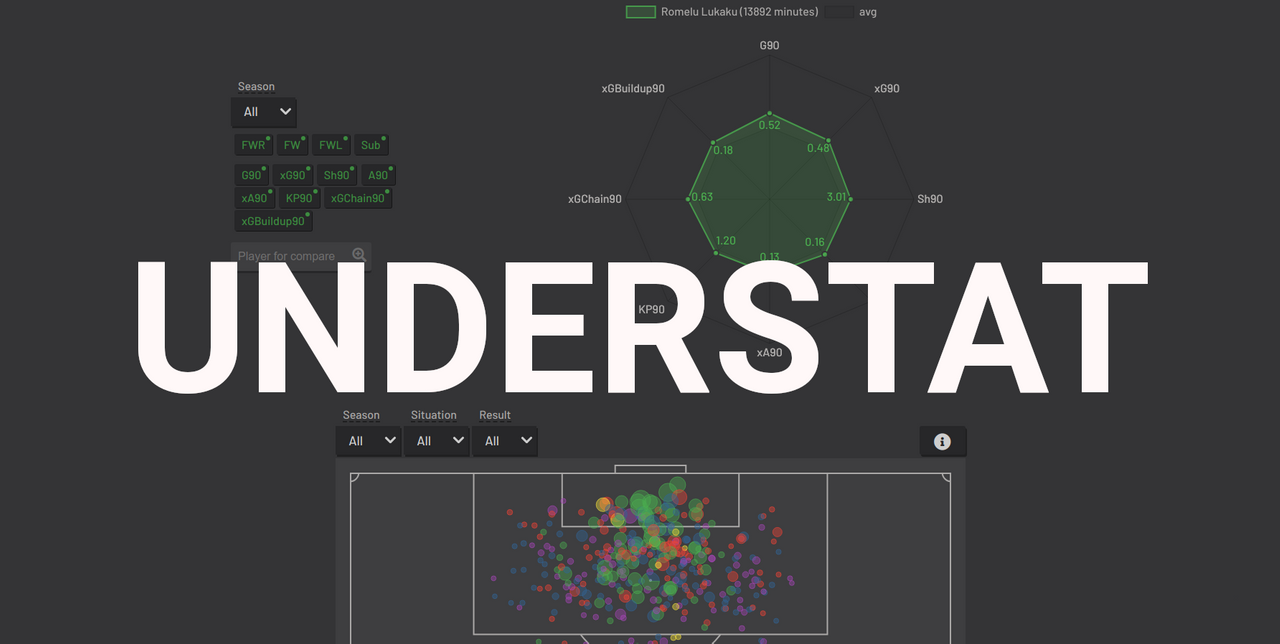


<a id="1."></a>
# Introduction
In this notebook we'll explore trends to determine the performance in the short and long term as we'll metrics such as xG, xGA goals scored and conceded. This plot is of utmost importance to the team as the xG Difference is one of the best indicators to the team's success. This notebook as usual was heavily inspired by this notebook by [McKay Johns](https://github.com/mckayjohns/Viz-Templates/blob/master/movingaverages.ipynb) 

<a id="1.1"></a>
# Notebook content

* [1. Introduction](#1.)
    - [1.1. Notebook Content.](#1.1)
* [2.Importing libraries.](#2.)
* [3.Scraping xG data.](#3.)
* [4. Scraping match fixtures data](#4.)
* [5. Accommodate home and away fixtures](#5.)
* [6. Rolling averages plot](#6.)
   -  [6.1. xG Plot number of matches played](#6.1)
   -  [6.2. xG plot teams played against](#6.2)
* [7. References](#7.)

<a id="2."></a>
# Importing libraries

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
import numpy as np
from highlight_text import fig_text
import seaborn as sns
import requests
from bs4 import BeautifulSoup

<a id="3."></a>
# Scraping the data
We'll extract the data from Understat as usual and it"ll be from the standings table data. 

**Remember it is possible to obtain both full table standings and the team performance over the 38 games and in this case we'll extract the data for each of the 38 games for Leicester City and the 2020/2021 Season**

In [12]:
# Entering the league's  link
link = "https://understat.com/league/epl"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the table 
strings = scripts[2].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

As we have now the json file, we'll select the key for the dictionary number 75 and history and select the columns required for the plot.

In [13]:
# Creating the dataframe
df =  pd.DataFrame(data['75']['history'])

# Selecting the useful columns 
df = df[['xG','scored','xGA','missed','npxG','npxGA','xpts','npxGD']]

# Creating one new column
df['Match'] = np.arange(1,39)

Creating the series of averages over a window of 3 . 

The window is at your choice and as high as possible is better. 

In [14]:
# Creating the rolling/moving average columns
df['xgSMA'] = df['xG'].rolling(window=3).mean()
df['xgaSMA'] = df['xGA'].rolling(window=3).mean()
df['GSMA'] = df['scored'].rolling(window=3).mean()
df['GASMA'] = df['missed'].rolling(window=3).mean()

<a id="4."></a>
# Scraping the matches fixtures 
Let's proceed by scraping the fixtures in which Leicester participated in order to use it as axis for the xG plot

In [16]:
# Entering the league's  link
link = "https://understat.com/team/Leicester/2020"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the table 
strings = scripts[1].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [17]:
df1 = pd.DataFrame(data)
# Home and Away fixtures
df_a = df1['a'].apply(pd.Series)
df_h = df1['h'].apply(pd.Series)
# Append both together
df_lei = pd.DataFrame(df_h)
display(df_h,df_a)

,id,title,short_title
0,76,West Bromwich Albion,WBA
1,75,Leicester,LEI
2,88,Manchester City,MCI
3,75,Leicester,LEI
4,75,Leicester,LEI
5,83,Arsenal,ARS
6,245,Leeds,LED
7,75,Leicester,LEI
8,87,Liverpool,LIV
9,75,Leicester,LEI


,id,title,short_title
0,75,Leicester,LEI
1,92,Burnley,BUR
2,75,Leicester,LEI
3,81,West Ham,WHU
4,71,Aston Villa,AVL
5,75,Leicester,LEI
6,75,Leicester,LEI
7,229,Wolverhampton Wanderers,WOL
8,75,Leicester,LEI
9,228,Fulham,FLH


Now we have a problem, the json data provided us with a home and away team names , meaning one week Licester was the home team and Arsenal the away team , but that's not what interests us right now, instead of the home and away teams we want to know the teams no matter home or away that played against Leicester City so for that we are going to add the home and away teams text data together and later eliminate it to get the actual teams that played against Leicester that same season.

<a id="5."></a>
# Accommodate home and away fixtures

In [18]:
df1['short_title_h'] = df_h['short_title']
df1['short_title_a'] = df_a['short_title']

In [22]:
df1 = df1[['short_title_h','short_title_a']]
df1['final'] = df1['short_title_h']+df1['short_title_a']

Here we added the the names together in order to eliminate the LEI characters and have the name of the team Leicester City played against that weekend.

In [23]:
df1

,short_title_h,short_title_a,final
0,WBA,LEI,WBALEI
1,LEI,BUR,LEIBUR
2,MCI,LEI,MCILEI
3,LEI,WHU,LEIWHU
4,LEI,AVL,LEIAVL
5,ARS,LEI,ARSLEI
6,LED,LEI,LEDLEI
7,LEI,WOL,LEIWOL
8,LIV,LEI,LIVLEI
9,LEI,FLH,LEIFLH


In [29]:
df1['final'] = df1['final'].str.replace("LEI","") # Eliminate the LEI name from the column
teams_played = df1['final'].tolist() # And now create a list containing the teams

Et voila , now we have the 38 matches that Leicester played in the 2020/2021 Season and can now proceed to plot the xG, xGA Rolling averages


In [31]:
display(teams_played)

['WBA',
 'BUR',
 'MCI',
 'WHU',
 'AVL',
 'ARS',
 'LED',
 'WOL',
 'LIV',
 'FLH',
 'SHE',
 'BRI',
 'EVE',
 'TOT',
 'MUN',
 'CRY',
 'NEW',
 'SOU',
 'CHE',
 'EVE',
 'LED',
 'FLH',
 'WOL',
 'LIV',
 'AVL',
 'ARS',
 'BUR',
 'BRI',
 'SHE',
 'MCI',
 'WHU',
 'WBA',
 'CRY',
 'SOU',
 'NEW',
 'MUN',
 'CHE',
 'TOT']

<a id="6."></a>
# xG Plot rolling averages

<a id="6.1"></a>
## xG plot with matches played

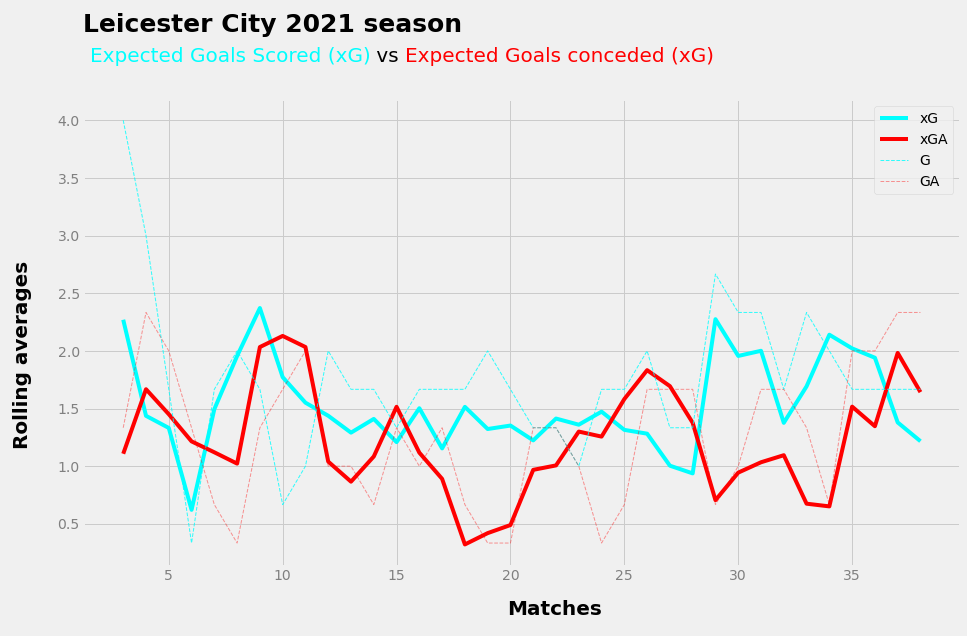

In [28]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))
# plotting xG and xGA
ax.plot(df.Match,df.xgSMA,label='xG',color='cyan')
ax.plot(df.Match,df.xgaSMA,color='red',label='xGA')
#plotting G and GA
ax.plot(df.Match,df.GSMA,label='G',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
ax.plot(df.Match,df.GASMA,color='red',label='GA',linestyle='dashed',linewidth=1,alpha=0.4)
# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.legend()

# title
fig_text(0.08,1.03, s="Leicester City 2021 season\n", fontsize = 25, fontweight = "bold")
fig_text(0.08,0.97, s=" <Expected Goals Scored (xG)> vs <Expected Goals conceded (xG)>",highlight_textprops=[{"color":'cyan'}, {'color':"red"}], fontsize = 20, fontweight="light")

# text
fig_text(0.5,0.01, s="Matches\n", fontsize = 20, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="Rolling averages\n", fontsize = 20, fontweight = "bold", color = "black",rotation=90)

<a id="6.2"></a>
## xG plot with team names

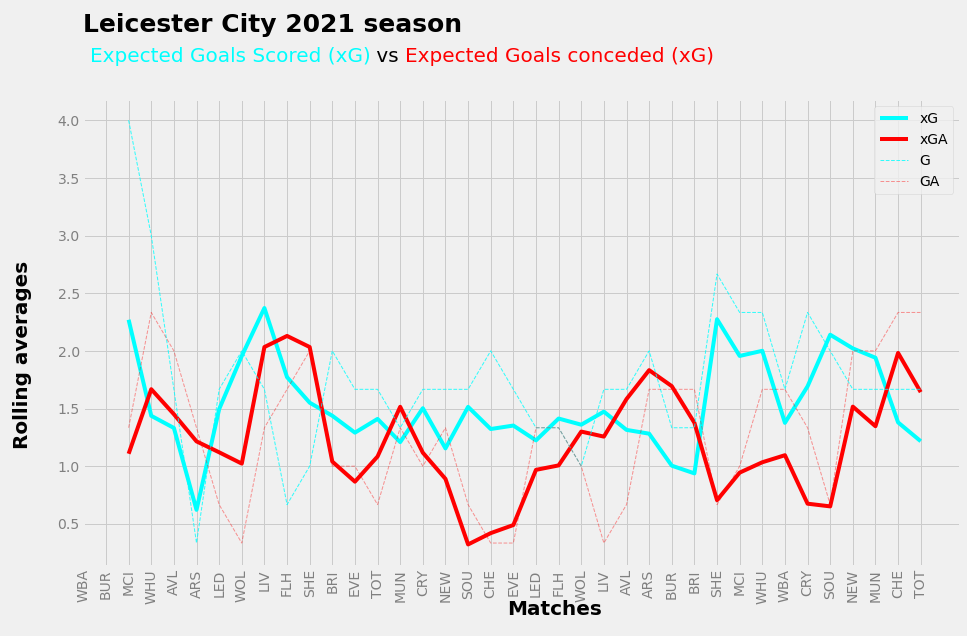

In [42]:
# plot style 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize = (14,8))

# plotting xG and xGA
ax.plot(df.Match,df.xgSMA,label='xG',color='cyan')
ax.plot(df.Match,df.xgaSMA,color='red',label='xGA')

#plotting G and GA
ax.plot(df.Match,df.GSMA,label='G',color='cyan',linestyle='dashed',linewidth=1,alpha=0.8)
ax.plot(df.Match,df.GASMA,color='red',label='GA',linestyle='dashed',linewidth=1,alpha=0.4)

# style 
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

# Team Names
plt.xticks(df.Match,teams_played, rotation='vertical')

# title
fig_text(0.08,1.03, s="Leicester City 2021 season\n", fontsize = 25, fontweight = "bold")
fig_text(0.08,0.97, s=" <Expected Goals Scored (xG)> vs <Expected Goals conceded (xG)>",highlight_textprops=[{"color":'cyan'}, {'color':"red"}], fontsize = 20, fontweight="light")

# text
fig_text(0.5,0.01, s="Matches\n", fontsize = 20, fontweight = "bold", color = "black")
fig_text(0.01,0.6, s="Rolling averages\n", fontsize = 20, fontweight = "bold", color = "black",rotation=90)
plt.legend()

<a id="7."></a>
# References
These notebooks and articles were the main reference for this notebook: 
   1. https://aaronmoniz.com/projects/tableau-dashboard-rolling-xg-trends-of-premier-league-teams-17-18-20-21/
   
   
   2. https://theathletic.com/2276869/2020/12/21/arteta-arsenal-xg-percentage/ 
   
   
   3. https://www.r-bloggers.com/2021/07/j-league-soccer-2021-mid-season-review/ 
   
   
   4. https://github.com/mckayjohns/Viz-Templates/blob/master/movingaverages.ipynb 